In [1]:
# Cargar paquetes
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Descargar datos de CONAPO: 
# https://datos.gob.mx/busca/dataset/proyecciones-de-la-poblacion-de-mexico-y-de-las-entidades-federativas-2020-2070

# Asignar el directorio de trabajo, donde se encuentran los datos
import os
os.chdir("C:\\Users\\oskka\\OneDrive\\Documentos\\José\\CONAPO")

In [4]:
# Importar datos de población a inicio de año (por año, edad y sexo)
df = pd.read_csv('CONAPO\\00_Pob_Inicio_1950_2070.csv')

In [5]:
mexico = df[(df['ENTIDAD']=="República Mexicana") & (df['AÑO']==2000)]

In [6]:
mexico['Grupos_Edad'] = pd.cut(x = mexico['EDAD'], bins = [ 0, 1, 5, 10, 15, 20, 25, 30, 35, 40, 
                                                 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, max(mexico['EDAD'])],
                           right=False)

C:\Users\oskka\AppData\Local\Temp\ipykernel_1860\3592933187.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mexico['Grupos_Edad'] = pd.cut(x = mexico['EDAD'], bins = [ 0, 1, 5, 10, 15, 20, 25, 30, 35, 40,


In [7]:
print(mexico.iloc[0:10,:])

        RENGLON   AÑO             ENTIDAD  CVE_GEO  EDAD     SEXO  POBLACION  \
222200   222201  2000  República Mexicana        0     0  Hombres    1223106   
222201   222202  2000  República Mexicana        0     0  Mujeres    1181957   
222202   222203  2000  República Mexicana        0     1  Hombres    1204909   
222203   222204  2000  República Mexicana        0     1  Mujeres    1165724   
222204   222205  2000  República Mexicana        0     2  Hombres    1195243   
222205   222206  2000  República Mexicana        0     2  Mujeres    1157063   
222206   222207  2000  República Mexicana        0     3  Hombres    1195094   
222207   222208  2000  República Mexicana        0     3  Mujeres    1157224   
222208   222209  2000  República Mexicana        0     4  Hombres    1200503   
222209   222210  2000  República Mexicana        0     4  Mujeres    1162625   

       Grupos_Edad  
222200      [0, 1)  
222201      [0, 1)  
222202      [1, 5)  
222203      [1, 5)  
222204      [1

In [8]:
# Agregar la suma de población por los estratos de ENTIDAD-SEXO-GRUPOS DE EDAD
mexico2= mexico.groupby(['AÑO', 'SEXO','Grupos_Edad'], as_index=False)['POBLACION'].agg('sum')
# as_index=False -> permite que las variables de clasificación se mantengan

C:\Users\oskka\AppData\Local\Temp\ipykernel_1860\2116562622.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mexico2= mexico.groupby(['AÑO', 'SEXO','Grupos_Edad'], as_index=False)['POBLACION'].agg('sum')


In [9]:
# Quedan las tres variables de identificación y el valor poblacional
print(mexico2)

     AÑO     SEXO Grupos_Edad  POBLACION
0   2000  Hombres      [0, 1)    1223106
1   2000  Hombres      [1, 5)    4795749
2   2000  Hombres     [5, 10)    5991978
3   2000  Hombres    [10, 15)    5648098
4   2000  Hombres    [15, 20)    5007617
5   2000  Hombres    [20, 25)    4358913
6   2000  Hombres    [25, 30)    4070977
7   2000  Hombres    [30, 35)    3583660
8   2000  Hombres    [35, 40)    3072946
9   2000  Hombres    [40, 45)    2507597
10  2000  Hombres    [45, 50)    1975807
11  2000  Hombres    [50, 55)    1651347
12  2000  Hombres    [55, 60)    1366820
13  2000  Hombres    [60, 65)    1083796
14  2000  Hombres    [65, 70)     851464
15  2000  Hombres    [70, 75)     621858
16  2000  Hombres    [75, 80)     408113
17  2000  Hombres    [80, 85)     233343
18  2000  Hombres    [85, 90)     116100
19  2000  Hombres    [90, 95)      44798
20  2000  Hombres   [95, 100)      11273
21  2000  Hombres  [100, 105)       1517
22  2000  Hombres  [105, 109)         89
23  2000  Mujere

In [11]:
# Importar el archivo de defunciones
muertes = pd.read_csv('CONAPO\\01_Defunciones_1950_2070.csv')

In [12]:
muertes.tail()

,RENGLON,AÑO,ENTIDAD,CVE_GEO,SEXO,EDAD,DEFUNCIONES
737655,737656,2070,Zacatecas,32,Mujeres,107,23
737656,737657,2070,Zacatecas,32,Hombres,108,25
737657,737658,2070,Zacatecas,32,Mujeres,108,15
737658,737659,2070,Zacatecas,32,Hombres,109,19
737659,737660,2070,Zacatecas,32,Mujeres,109,10


In [14]:
# Seleccionar las filas que corresponden al total nacional, hasta el 2023.
muertes2 = muertes[(muertes['ENTIDAD']=="República Mexicana") & (muertes['AÑO']==2000)]

In [15]:
# Crear intervalos de grupos quinquenales de edad.
muertes2['Grupos_Edad'] = pd.cut(x = muertes2['EDAD'], bins=[0, 1, 5, 10, 15, 20, 25, 30, 35, 40, 
                                                 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, max(muertes2['EDAD'])],
                           right=False)
    # Intervalo abierto por la derecha

C:\Users\oskka\AppData\Local\Temp\ipykernel_1860\4129893267.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  muertes2['Grupos_Edad'] = pd.cut(x = muertes2['EDAD'], bins=[0, 1, 5, 10, 15, 20, 25, 30, 35, 40,


In [16]:
# Agregar la suma de población por los estratos de AÑO-SEXO-GRUPOS DE EDAD
muertes2= muertes2.groupby(['AÑO', 'SEXO','Grupos_Edad'], as_index=False)['DEFUNCIONES'].agg('sum')

C:\Users\oskka\AppData\Local\Temp\ipykernel_1860\3526656691.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  muertes2= muertes2.groupby(['AÑO', 'SEXO','Grupos_Edad'], as_index=False)['DEFUNCIONES'].agg('sum')


In [17]:
# Base de datos de población y muertes con la misma estructura.
mexico2.shape
muertes2.shape

(46, 4)

In [18]:
# Se fusionan las tablas de población y de defunciones
tabla = pd.merge(mexico2, muertes2, how='left', on=['AÑO', 'SEXO', 'Grupos_Edad'])

In [19]:
# Se obtiene la edad de inicio de cada intervalo
tabla['x'] = tabla['Grupos_Edad'].apply(lambda intervalo: intervalo.left)

In [20]:
print(tabla)
#list(range(1950, 2024))

     AÑO     SEXO Grupos_Edad  POBLACION  DEFUNCIONES    x
0   2000  Hombres      [0, 1)    1223106        29880    0
1   2000  Hombres      [1, 5)    4795749         4776    1
2   2000  Hombres     [5, 10)    5991978         2160    5
3   2000  Hombres    [10, 15)    5648098         2763   10
4   2000  Hombres    [15, 20)    5007617         4876   15
5   2000  Hombres    [20, 25)    4358913         6939   20
6   2000  Hombres    [25, 30)    4070977         8935   25
7   2000  Hombres    [30, 35)    3583660         9883   30
8   2000  Hombres    [35, 40)    3072946        10380   35
9   2000  Hombres    [40, 45)    2507597        10623   40
10  2000  Hombres    [45, 50)    1975807        10993   45
11  2000  Hombres    [50, 55)    1651347        12591   50
12  2000  Hombres    [55, 60)    1366820        15058   55
13  2000  Hombres    [60, 65)    1083796        17702   60
14  2000  Hombres    [65, 70)     851464        20914   65
15  2000  Hombres    [70, 75)     621858        23272   

In [21]:
# Genera variables vacías: sobrevivientes, intervalo n, 

tabla['Tasa.Mortalidad'] = 0
tabla['n'] = 0
tabla['nax'] = 0
tabla['qx'] = 0
tabla['px'] = 0
tabla['lx'] = 0
tabla['apvLx'] = 0
tabla['Tx'] = 0
tabla['evx'] = 0

In [23]:
# Función para calcular los sobrevivientes de la Tabla de Mortalidad

def sobreviviente(df):
    for j in range(1950, 2024):
        df_anio=df[(df['AÑO']==j)]
                
        for i in range(len(df_anio)):
           
            # 1) Intervalo n por grupo de edad
            if df_anio['x'].iloc[i]==0:
                df_anio['n'].iloc[i] = 1
            elif df_anio['x'].iloc[i]==1:
                df_anio['n'].iloc[i] = 4
            else:
                df_anio['n'].iloc[i] = 5
            
            # 2) Tasa de mortalidad
            #if df_anio['x'].iloc[i] < 100:
            df_anio['Tasa.Mortalidad'].iloc[i] = (df_anio['DEFUNCIONES'].iloc[i] / df_anio['POBLACION'].iloc[i])
            #else:
            #    df_anio['Tasa.Mortalidad'].iloc[i] = 1
            
            # 2) Años Persona Vividos por grupo de edad (nax)
            # 2.1) Grupo de 0 a 1 años.
            if df_anio['x'].iloc[i]==0:
                if df_anio['Tasa.Mortalidad'].iloc[i] >= 0.107:
                    if df_anio['SEXO'].iloc[i] == "Hombres":
                        df_anio['nax'].iloc[i] = 0.330
                    else:
                        df_anio['nax'].iloc[i] = 0.350
                else:
                    if df_anio['SEXO'].iloc[i] == "Hombres":
                        df_anio['nax'].iloc[i] = 0.045 + 2.684 * df_anio['Tasa.Mortalidad'].iloc[i]
                    else:
                        df_anio['nax'].iloc[i] = 0.053 + 2.8 * df_anio['Tasa.Mortalidad'].iloc[i]
            
            # 2.2) Grupo de 1 a 5 años.
            elif df_anio['x'].iloc[i]==1:
                if df_anio['Tasa.Mortalidad'].iloc[i-1] >= 0.107:
                    if df_anio['SEXO'].iloc[i] == "Hombres":
                        df_anio['nax'].iloc[i] = 1.352
                    else:
                        df_anio['nax'].iloc[i] = 1.361
                else:
                    if df_anio['SEXO'].iloc[i] == "Hombres":
                        df_anio['nax'].iloc[i] = 1.651 - 2.816 * df_anio['Tasa.Mortalidad'].iloc[i]
                    else:
                        df_anio['nax'].iloc[i] = 1.522 - 1.518 * df_anio['Tasa.Mortalidad'].iloc[i]
                        
            # 2.3) Grupos de 5 o más años.
            else:
                df_anio['nax'].iloc[i] = df_anio['n'].iloc[i] / 2
            
            # 3) Probabilidad de fallecer a la edad x (Preston, Heuveline & Guillot, 2001, p. 43 y sig.)
            #if df_anio['x'].iloc[i] < 105 :
                #FUNCIÓN 3.1 CON BASE EN nax
                #df_anio['qx'].iloc[i] = (df_anio['n'].iloc[i] * df_anio['Tasa.Mortalidad'].iloc[i]) / ( 1 + (df_anio['n'].iloc[i] - df_anio['nax'].iloc[i]) * df_anio['Tasa.Mortalidad'].iloc[i])
                #Función 3.2 con base en nmx
            df_anio['qx'].iloc[i] = (2 * df_anio['n'].iloc[i] * df_anio['Tasa.Mortalidad'].iloc[i] ) / (2 + df_anio['n'].iloc[i] * df_anio['Tasa.Mortalidad'].iloc[i])
            #else:
            #    df_anio['qx'].iloc[i] = 1
                
            if df_anio['qx'].iloc[i] < 1:
                df_anio['qx'].iloc[i] = df_anio['qx'].iloc[i]
            else:
                df_anio['qx'].iloc[i] = 1
            # 4) Probabilidad de sobrevivir a la edad x
            df_anio['px'].iloc[i] = 1 - df_anio['qx'].iloc[i]
            
            # 5) Cálculo de Sobrevivientes a la edad exacta x
            if df_anio['x'].iloc[i]==0:
                df_anio['lx'].iloc[i] = 1000000
            else:
                df_anio['lx'].iloc[i] = round(df_anio['lx'].iloc[i-1]*(1-df_anio['qx'].iloc[i-1]))
            
            # 6) Cálculo de apv_Lx = (sobrevivientes en x+n * n) + (fallecidos antes de x+n * años vividos en promedio)
            df_anio['apvLx'].iloc[i] = round((df_anio['lx'].iloc[i] - df_anio['lx'].iloc[i] * df_anio['qx'].iloc[i]) * df_anio['n'].iloc[i]) + round((df_anio['lx'].iloc[i] * df_anio['qx'].iloc[i] * df_anio['nax'].iloc[i]), 1 )
            
        # 7) Cálculo de Tx
        # Una vez obtenida la tabla de vida, tomo la suma de Lx y descuento los APV de cada grupo
        for i in reversed(range(len(df_anio))):
            if df_anio['x'].iloc[i] == 105:
                df_anio['Tx'].iloc[i] = df_anio['apvLx'].iloc[i]
            else:
                df_anio['Tx'].iloc[i] = df_anio['apvLx'].iloc[i] + df_anio['Tx'].iloc[i+1]
            #else:
            #    df_anio['Tx'].iloc[i] = 0
                
        # 8) Cálculo de la Esperanza de Vida
            df_anio['evx'].iloc[i] = round(df_anio['Tx'].iloc[i] / df_anio['lx'].iloc[i], 1)
                
        # 9) Concatenar las tablas de cada año
        if j==1950:
            new = df_anio
        else:    
            new = pd.concat([new, df_anio], axis=0)
    return(new)
         

In [24]:
nuevo = sobreviviente(tabla)

C:\Users\oskka\AppData\Local\Temp\ipykernel_1860\2126437751.py:11: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_anio['n'].iloc[i] = 1
C:\Users\oskka\AppData\Local\Temp\ipykernel_1860\2126437751.py:11: SettingWithCopyWarning: 
A value is 

In [29]:
x = nuevo.x[(nuevo['AÑO']==2000) & (nuevo['SEXO']=="Hombres")]
y1 = nuevo.evx[(nuevo['AÑO']==2000) & (nuevo['SEXO']=="Hombres")]
y2 = nuevo.evx[(nuevo['AÑO']==2000) & (nuevo['SEXO']=="Mujeres")]


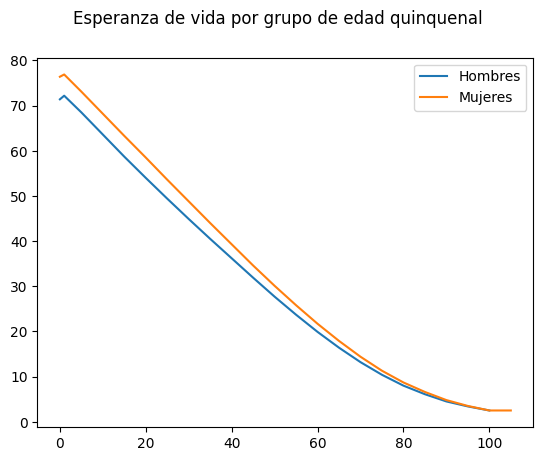

In [30]:
fig, axs = plt.subplots()
fig.suptitle('Esperanza de vida por grupo de edad quinquenal')
axs.plot(x, y1, label='Hombres')
axs.plot(x, y2, label='Mujeres')

#Legend
axs.legend()

plt.show()

In [31]:
nuevo.to_csv("bin\\tabla_de_mortalidad_2000.csv", index = False)